#Task 5 : Image Compression using Matrix Factorisation [3 Marks]
You have an image patch of size (50x50) that you want to compress using matrix factorization. To do this, you'll split the patch
[
N
×
N
]
 into two smaller matrices of size
[
N
×
r
]
 and
[
r
×
N
]
 using matrix factorization. Compute the compressed patch by multiplying these two matrices and compare the reconstructed image patch with the original patch. Compute the Root Mean Squared Error (RMSE) and Peak Signal-to-Noise Ratio (PSNR) between the original and reconstructed image patches.

1. Test different values for the low-rank
r
=
[
5
,
10
,
25
,
50
]
.

2. Use Gradient Descent to learn the compressed matrices.

3. Display the reconstructed image patches, keeping the original pixel values outside the patch unchanged, and use your compressed matrix for the patch to show how well the reconstruction works.

4. Compute the RMSE and PSNR for each value of
r
.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Step 1: Extracting the Image Patch
You’ll begin by extracting a 50x50 patch from the image. This patch will be the region that we’ll compress and reconstruct.

Single color patch: An area of the image with one dominant color.

Two-color patch: An area with 2-3 distinct colors.

Multi-color patch: A region with 5 or more colors.

The following code allows you to extract this patch from an image.

In [ ]:
# Main execution for task
def task5_image_compression(image, patch_coords, ranks=[5, 10, 25, 50]):
    # Extract the 50x50 patch from the image
    x, y = patch_coords  # Top-left corner of the patch
    image_patch = image[x:x+50, y:y+50]

    # Compress and reconstruct the patch for different ranks
    results = compress_and_reconstruct(image_patch, ranks)

    # Return the results for further analysis
    return results


Step 2: Matrix Factorization (Compression)
In Matrix Factorization (MF), the image patch (which is a 50x50 matrix) will be factorized into two smaller matrices,
𝑈
U and
𝑉
V:

𝑈
U of size
𝑁
×
𝑟
N×r (50x
𝑟
r),
𝑉
V of size
𝑟
×
𝑁
r×N (
𝑟
×
50
r×50).
This process is done using Gradient Descent to learn the values of
𝑈
U and
𝑉
V, which minimize the reconstruction error.

In [ ]:
# Function to perform matrix factorization using Gradient Descent
def matrix_factorization(image_patch, rank, steps=5000, alpha=0.0002, beta=0.02):
    m, n = image_patch.shape
    U = np.random.rand(m, rank)
    V = np.random.rand(n, rank)

    non_zero = np.argwhere(image > 0)  # Indices of non-zero pixels

    # Perform gradient descent
    for step in range(steps):
      np.random.shuffle(non_zero)  # Shuffle non-zero pixels for SGD
      for i, j in non_zero:
          eij = image[i, j] - np.dot(U[i, :], V[j, :].T)
          U[i, :] += alpha * (2 * eij * V[j, :] - beta * U[i, :])
          V[j, :] += alpha * (2 * eij * U[i, :] - beta * V[j, :])

    # Optionally, you can add a stopping criterion based on the change in RMSE or loss
    # return np.dot(U, V.T)
    return U, V

Step 3: Reconstructing the Patch
Once the two smaller matrices
𝑈
U and
𝑉
V are learned, the next step is to reconstruct the image patch by multiplying
𝑈
×
𝑉
𝑇
U×V
T
 .

In [ ]:
# Image compression and reconstruction
def compress_and_reconstruct(image_patch, ranks):
    original_patch = image_patch.copy()

    results = []

    for rank in ranks:
        print(f"Compressing with rank: {rank}")
        U, V = matrix_factorization(image_patch, rank)
        reconstructed_patch = np.dot(U, V.T)  # Reconstructed image

        # Calculate RMSE and PSNR
        rmse, psnr = calculate_rmse_psnr(original_patch, reconstructed_patch)
        results.append((rank, reconstructed_patch, rmse, psnr))

        # Display the original and reconstructed patches
        plt.subplot(1, 2, 1)
        plt.imshow(original_patch, cmap='gray')
        plt.title(f"Original Patch (50x50)")

        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed_patch, cmap='gray')
        plt.title(f"Reconstructed Patch (Rank: {rank})")
        plt.show()

        print(f"RMSE: {rmse}, PSNR: {psnr}")

    return results


Step 4: RMSE and PSNR Calculation
You need to compute two key metrics to evaluate the quality of the reconstructed patch:

RMSE (Root Mean Squared Error): Measures the average difference between the original and reconstructed pixels.
PSNR (Peak Signal-to-Noise Ratio): Higher PSNR indicates better reconstruction quality.

In [ ]:
# RMSE and PSNR calculation
def calculate_rmse_psnr(original, reconstructed):
    rmse_value = np.sqrt(mean_squared_error(original, reconstructed))
    psnr_value = 20 * np.log10(1 / rmse_value)  # Assuming pixel values are normalized between 0 and 1
    return rmse_value, psnr_value


In [ ]:
# Test with different patch cases
image = plt.imread('/content/The-famous-Lena-image-often-used-as-an-example-in-image-processing.png')  # Load your image here
if len(image.shape) == 3:  # Convert to grayscale if needed
    image = np.mean(image, axis=2)

# Coordinates of the patches (choose based on single color, multiple colors, etc.)
single_color_patch_coords = (10, 10)
two_color_patch_coords = (60, 60)
multi_color_patch_coords = (120, 120)

# Perform the task for different patches
print("Single Color Patch Compression:")
task5_image_compression(image, single_color_patch_coords)

print("Two Color Patch Compression:")
task5_image_compression(image, two_color_patch_coords)

print("Multi-Color Patch Compression:")
task5_image_compression(image, multi_color_patch_coords)

Step 5: Displaying the Results
For each rank value, the original and reconstructed patches are displayed side by side. This allows you to visually compare how well the compression and reconstruction work.

Single Color Patch Compression:
Compressing with rank: 5


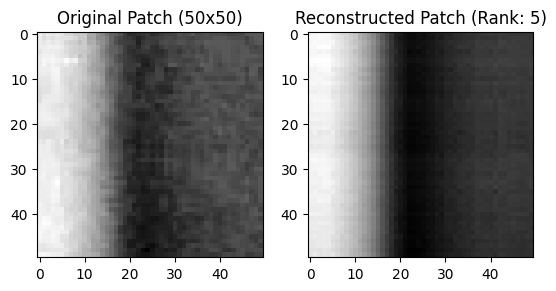

RMSE: 0.01531792668956768, PSNR: 36.29600026614995
Compressing with rank: 10


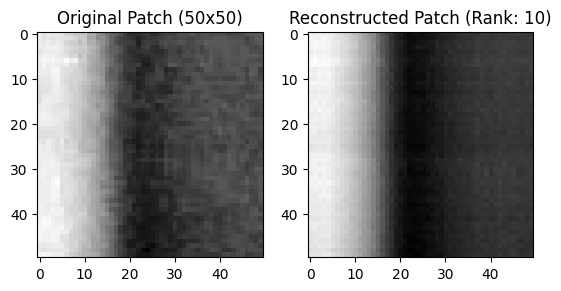

RMSE: 0.015143684234626444, PSNR: 36.39536909101333
Compressing with rank: 25


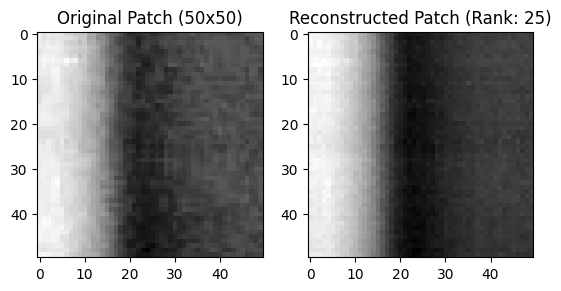

RMSE: 0.014466945941710193, PSNR: 36.79246282703754
Compressing with rank: 50


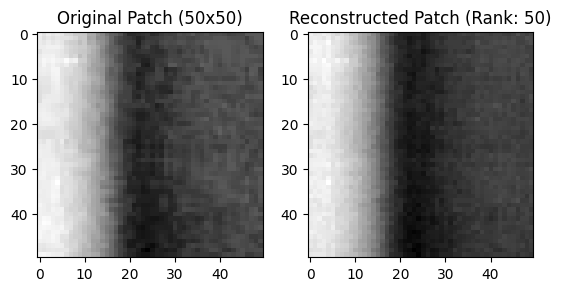

RMSE: 0.01276579799096008, PSNR: 37.87904064463135
Two Color Patch Compression:
Compressing with rank: 5


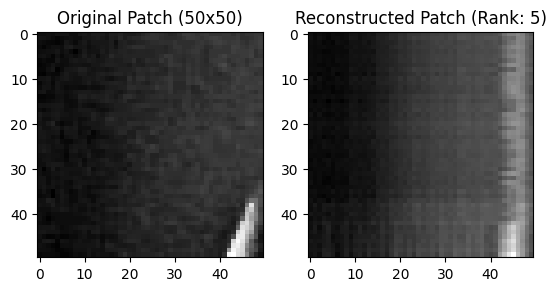

RMSE: 0.0328725037133816, PSNR: 29.6633443379013
Compressing with rank: 10


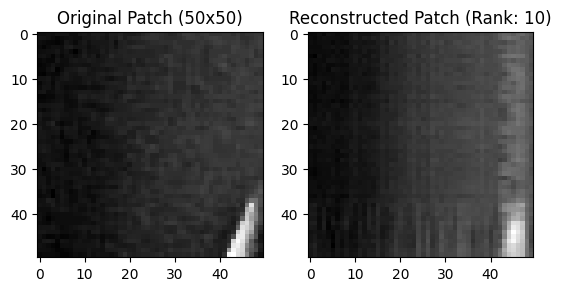

RMSE: 0.02869103238513399, PSNR: 30.845076486386986
Compressing with rank: 25


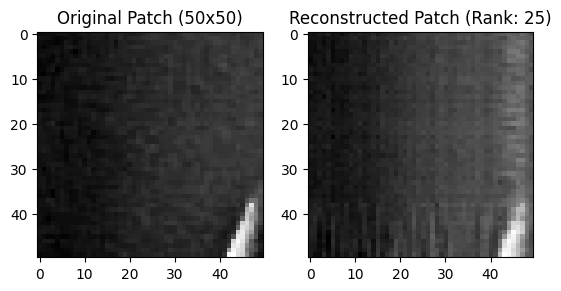

RMSE: 0.024918605700458132, PSNR: 32.06952523828142
Compressing with rank: 50


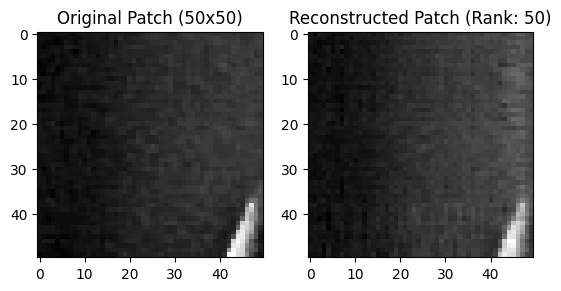

RMSE: 0.020408448298972325, PSNR: 33.80380028864001
Multi-Color Patch Compression:
Compressing with rank: 5


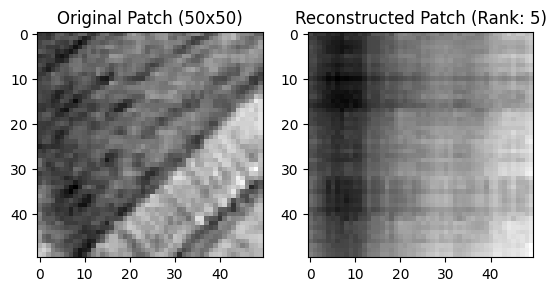

RMSE: 0.03760138370707642, PSNR: 28.495923460334712
Compressing with rank: 10


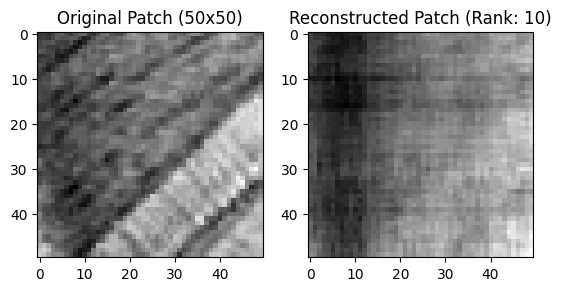

RMSE: 0.035082910574842696, PSNR: 29.098087670910417
Compressing with rank: 25


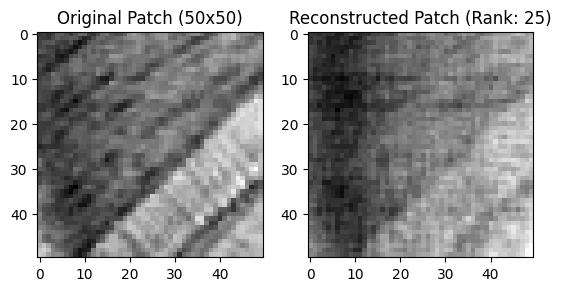

RMSE: 0.031139720215488182, PSNR: 30.13370587608724
Compressing with rank: 50


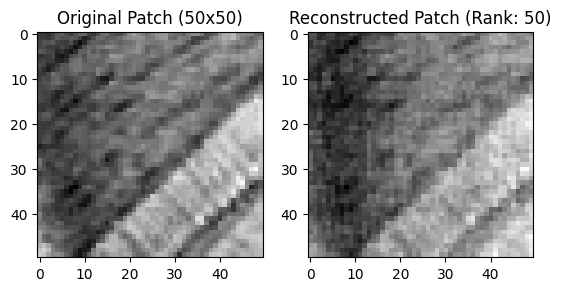

RMSE: 0.024675374090850365, PSNR: 32.15472508979427


[(5,
  array([[0.42925411, 0.41466666, 0.4175962 , ..., 0.51878288, 0.51015821,
          0.51589835],
         [0.42232597, 0.42115137, 0.41099741, ..., 0.50842237, 0.51529788,
          0.51886769],
         [0.42799599, 0.4245332 , 0.41586811, ..., 0.4974993 , 0.50897542,
          0.51567034],
         ...,
         [0.46416493, 0.46083776, 0.45063763, ..., 0.53539232, 0.54923064,
          0.55827373],
         [0.46429358, 0.4557264 , 0.45002455, ..., 0.54332052, 0.54632827,
          0.55629566],
         [0.46985754, 0.46106347, 0.45483082, ..., 0.54305567, 0.54797106,
          0.55920488]]),
  0.03760138370707642,
  28.495923460334712),
 (10,
  array([[0.43033131, 0.41589879, 0.41658337, ..., 0.49163074, 0.49738851,
          0.50274553],
         [0.43072814, 0.42139959, 0.41934976, ..., 0.48810757, 0.48783717,
          0.50531984],
         [0.428086  , 0.42995827, 0.43062579, ..., 0.48251548, 0.49622873,
          0.51261382],
         ...,
         [0.47732624, 0.4772871

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to perform matrix factorization using Gradient Descent
def matrix_factorization(image_patch, rank, steps=5000, alpha=0.0002, beta=0.02):
    m, n = image_patch.shape
    U = np.random.rand(m, rank)
    V = np.random.rand(n, rank)

    non_zero = np.argwhere(image > 0)  # Indices of non-zero pixels

    # Perform gradient descent
    for step in range(steps):
      np.random.shuffle(non_zero)  # Shuffle non-zero pixels for SGD
      for i, j in non_zero:
          eij = image[i, j] - np.dot(U[i, :], V[j, :].T)
          U[i, :] += alpha * (2 * eij * V[j, :] - beta * U[i, :])
          V[j, :] += alpha * (2 * eij * U[i, :] - beta * V[j, :])

    # Optionally, you can add a stopping criterion based on the change in RMSE or loss
    # return np.dot(U, V.T)
    return U, V


# RMSE and PSNR calculation
def calculate_rmse_psnr(original, reconstructed):
    rmse_value = np.sqrt(mean_squared_error(original, reconstructed))
    psnr_value = 20 * np.log10(1 / rmse_value)  # Assuming pixel values are normalized between 0 and 1
    return rmse_value, psnr_value

# Image compression and reconstruction
def compress_and_reconstruct(image_patch, ranks):
    original_patch = image_patch.copy()

    results = []

    for rank in ranks:
        print(f"Compressing with rank: {rank}")
        U, V = matrix_factorization(image_patch, rank)
        reconstructed_patch = np.dot(U, V.T)  # Reconstructed image

        # Calculate RMSE and PSNR
        rmse, psnr = calculate_rmse_psnr(original_patch, reconstructed_patch)
        results.append((rank, reconstructed_patch, rmse, psnr))

        # Display the original and reconstructed patches
        plt.subplot(1, 2, 1)
        plt.imshow(original_patch, cmap='gray')
        plt.title(f"Original Patch (50x50)")

        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed_patch, cmap='gray')
        plt.title(f"Reconstructed Patch (Rank: {rank})")
        plt.show()

        print(f"RMSE: {rmse}, PSNR: {psnr}")

    return results

# Main execution for task
def task5_image_compression(image, patch_coords, ranks=[5, 10, 25, 50]):
    # Extract the 50x50 patch from the image
    x, y = patch_coords  # Top-left corner of the patch
    image_patch = image[x:x+50, y:y+50]

    # Compress and reconstruct the patch for different ranks
    results = compress_and_reconstruct(image_patch, ranks)

    # Return the results for further analysis
    return results

# Test with different patch cases
image = plt.imread('/content/The-famous-Lena-image-often-used-as-an-example-in-image-processing.png')  # Load your image here
if len(image.shape) == 3:  # Convert to grayscale if needed
    image = np.mean(image, axis=2)

# Coordinates of the patches (choose based on single color, multiple colors, etc.)
single_color_patch_coords = (10, 10)
two_color_patch_coords = (60, 60)
multi_color_patch_coords = (120, 120)

# Perform the task for different patches
print("Single Color Patch Compression:")
task5_image_compression(image, single_color_patch_coords)

print("Two Color Patch Compression:")
task5_image_compression(image, two_color_patch_coords)

print("Multi-Color Patch Compression:")
task5_image_compression(image, multi_color_patch_coords)
